In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Upload the updated spotify dataframe. Name it df

df = pd.read_csv("C:/Users/nyolc/OneDrive/Asztali gép/CS251/spotify_update_nov_2024.csv")

In [3]:
pd.set_option('display.max_columns', None);

In [4]:
# Display the first 5 rows of the dataframe
df.head()

,track_name,main_artist,supporting_artists,artist_count,released_year,released_month,released_day,released_date,day_name,season,in_spotify_playlists,in_spotify_charts,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,2,2023,7,14,2023-07-14,Friday,Summer,553,147,141381703,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,NaN,1,2023,3,23,2023-03-23,Thursday,Spring,1474,48,133716286,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,NaN,1,2023,6,30,2023-06-30,Friday,Summer,1397,113,140003974,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,NaN,1,2019,8,23,2019-08-23,Friday,Summer,7858,100,800840817,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,NaN,1,2023,5,18,2023-05-18,Thursday,Spring,3133,50,303236322,144,A,Minor,65,23,80,14,63,11,6


In [12]:
df.shape

(952, 23)

# Questions - Part 1: 

1. What are the artists of the 7 most streamed songs?
2. What are the track names of the 10 most streamed songs?
3. Does the valence variable follow a normal distribution? Make a graph to see. 
4. Is there a correlation between energy, danceability, and liveness? Make a correlation chart and graph to see. 
5. Check relationships between energy, danceability, and liveness using a pairplot.
6. Do classic songs (Check out Sweet Child O' Mine, Bohemian Rhapsody - Remastered 2011, & Every Breath You Take - Remastered 2003) have more streams than songs from 2022?
7. Which is a better indicator of streams: charts or playlists?
8. Did songs released during Covid have more or less danceablity than songs released before or after covid?
9. In the summer, is the music released different from the winter? Check which season has music with more liveness. 

# ANSWER THE QUESTIONS

## 1. What are the artists of the 7 most streamed songs?

In [13]:
# what are the artists of the 7 most streamed songs?
df[['main_artist', 'supporting_artists', 'streams']].sort_values(by='streams', ascending=False).head(7)



,main_artist,supporting_artists,streams
55,The Weeknd,NaN,3703895074
179,Ed Sheeran,NaN,3562543890
86,Lewis Capaldi,NaN,2887241814
619,Tones and I,NaN,2864791672
41,Post Malone,Swae Lee,2808096550
162,Drake,"WizKid, Kyla",2713922350
84,Justin Bieber,The Kid Laroi,2665343922


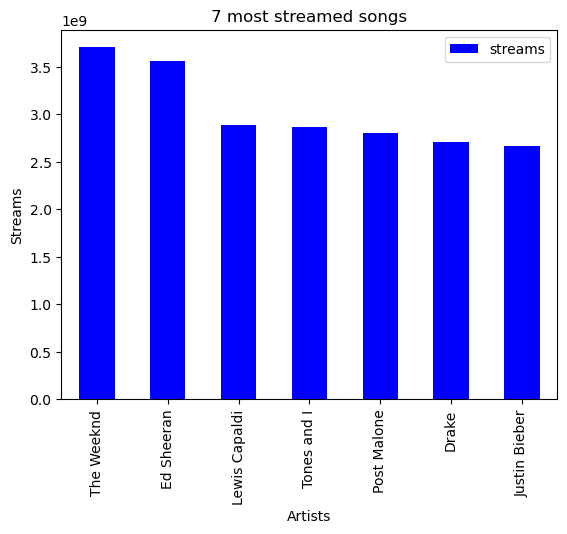

In [15]:
# show the artists of the 7 most streamed songs in a graph
df[['main_artist', 'supporting_artists', 'streams']].sort_values(by='streams', ascending=False).head(7).plot(kind='bar', x='main_artist', y='streams', color='blue')
plt.title('7 most streamed songs')
plt.ylabel('Streams')
plt.xlabel('Artists')
plt.show()


## 2. What are the track names of the 10 most streamed songs?

In [10]:
# what are the artists of the 10 most streamed songs?
df[['main_artist', 'supporting_artists','track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

,main_artist,supporting_artists,track_name,streams
55,The Weeknd,NaN,Blinding Lights,3703895074
179,Ed Sheeran,NaN,Shape of You,3562543890
86,Lewis Capaldi,NaN,Someone You Loved,2887241814
619,Tones and I,NaN,Dance Monkey,2864791672
41,Post Malone,Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,2808096550
162,Drake,"WizKid, Kyla",One Dance,2713922350
84,Justin Bieber,The Kid Laroi,STAY (with Justin Bieber),2665343922
140,Imagine Dragons,NaN,Believer,2594040133
724,The Chainsmokers,Halsey,Closer,2591224264
48,The Weeknd,Daft Punk,Starboy,2565529693


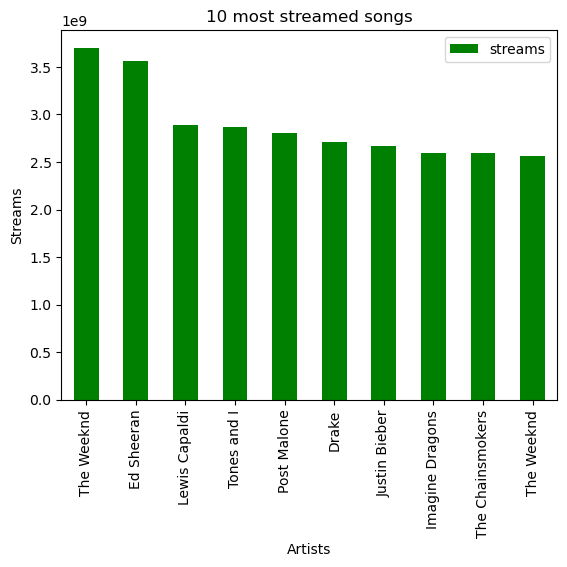

In [17]:
# Show in graph 
df[['main_artist', 'supporting_artists', 'streams']].sort_values(by='streams', ascending=False).head(10).plot(kind='bar', x='main_artist', y='streams', color='green')
plt.title('10 most streamed songs')
plt.ylabel('Streams')
plt.xlabel('Artists')
plt.show()

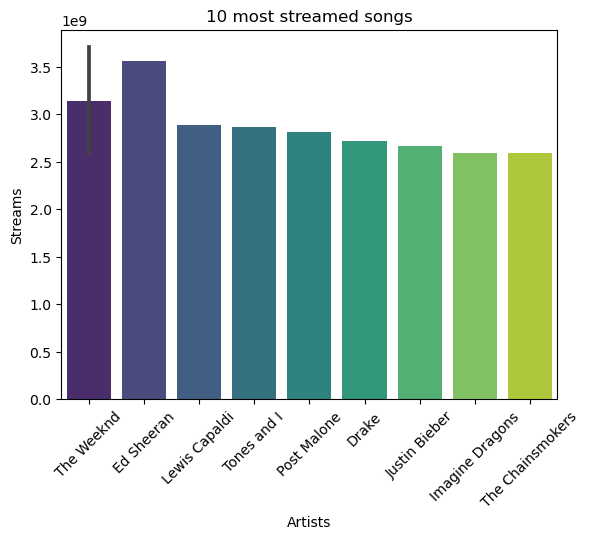

In [11]:
#in seaborn
sns.barplot(x='main_artist', y='streams', data=df[['main_artist', 'streams']].sort_values(by='streams', ascending=False).head(10), palette='viridis')
plt.title('10 most streamed songs')
plt.ylabel('Streams')
plt.xlabel('Artists')
plt.xticks(rotation=45);
plt.show()


## 3. Does valence follow a normal distribution? 
- Make a graph to see.

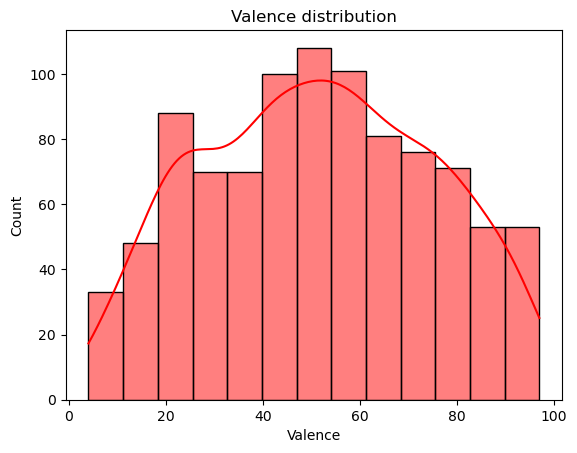

Statistics=0.978, p=0.000
Valence does not follow a normal distribution


In [14]:
# Does valence follow a normal distribution?
sns.histplot(df['valence_%'], kde=True, color='red')
plt.title('Valence distribution')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.show()
# statistical test
from scipy.stats import shapiro
stat, p = shapiro(df['valence_%'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Valence follows a normal distribution')
else:
    print('Valence does not follow a normal distribution')

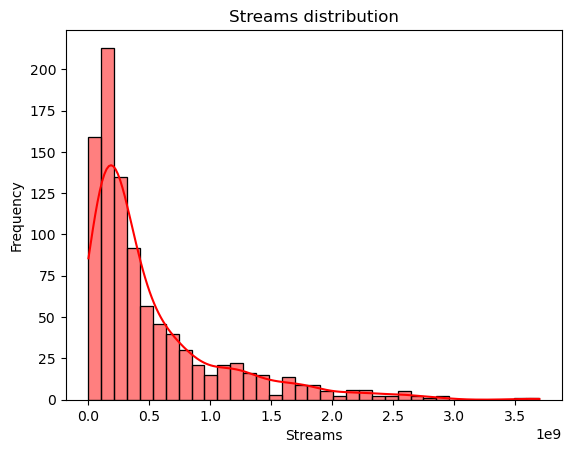

In [15]:
# Graph to check normal distribution
sns.histplot(df['streams'], kde=True, color='red')
plt.title('Streams distribution')
plt.ylabel('Frequency')
plt.xlabel('Streams')
plt.show()


## 4. Is there a correlation between energy, danceability, and liveness? Make a chart to check.

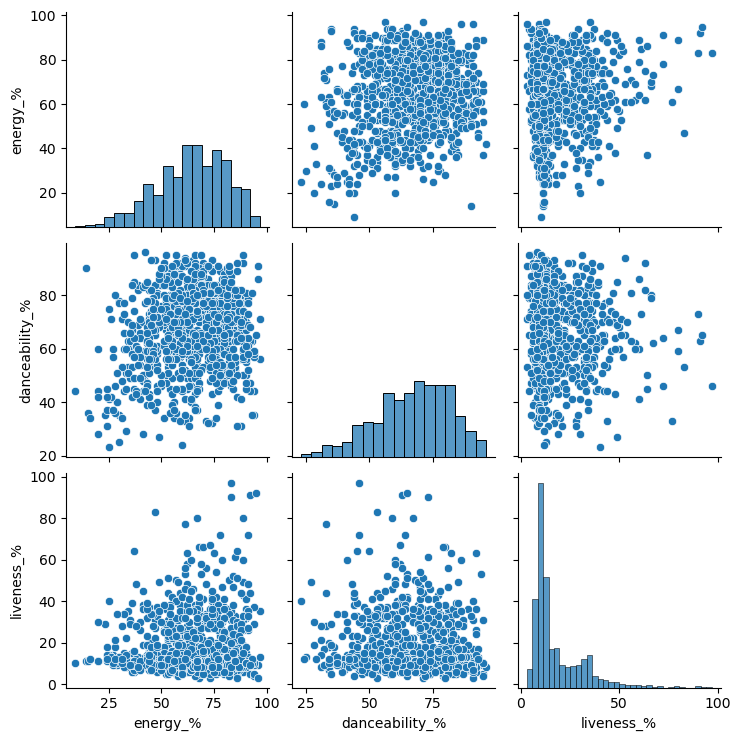

In [16]:
# view the correlation between energy, dancebility, and liveliness in a chart
sns.pairplot(df[['energy_%', 'danceability_%', 'liveness_%']])
plt.show()

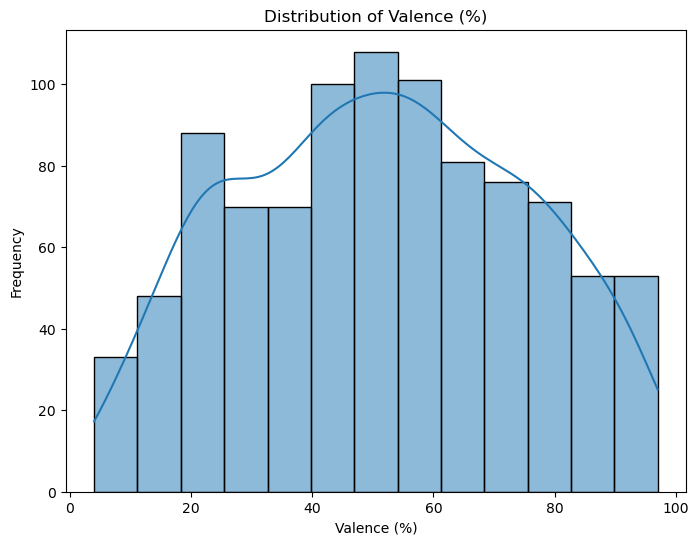

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['valence_%'], kde=True)
plt.title('Distribution of Valence (%)')
plt.xlabel('Valence (%)')
plt.ylabel('Frequency')
plt.show()


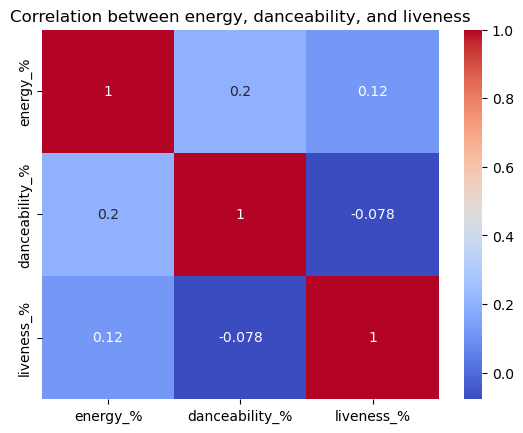

In [17]:
# View a heatmap of the correlation between energy, dancebility, and liveliness
sns.heatmap(df[['energy_%', 'danceability_%', 'liveness_%']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between energy, danceability, and liveness')
plt.show()


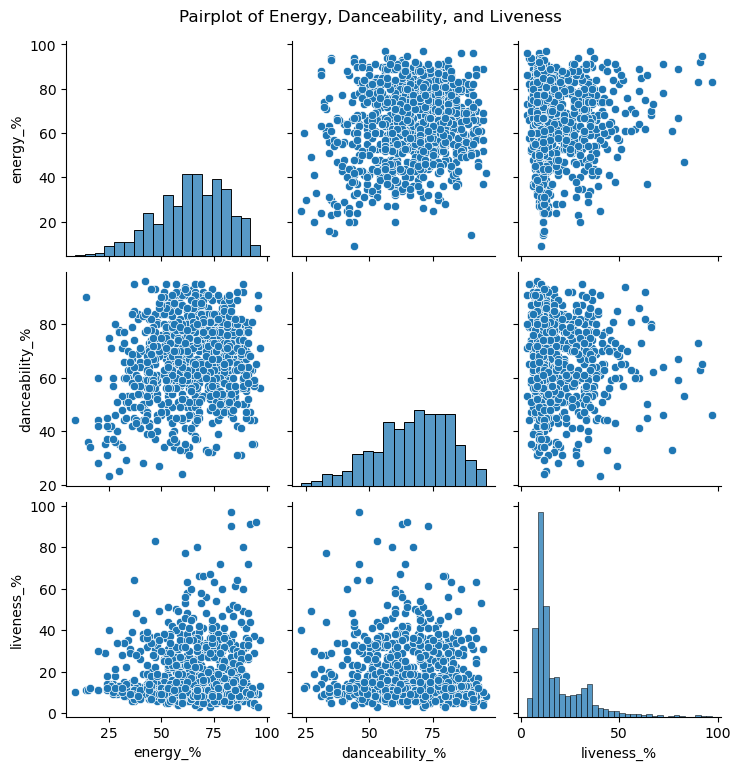

## 5. Check relationships between variables using a pairplot.

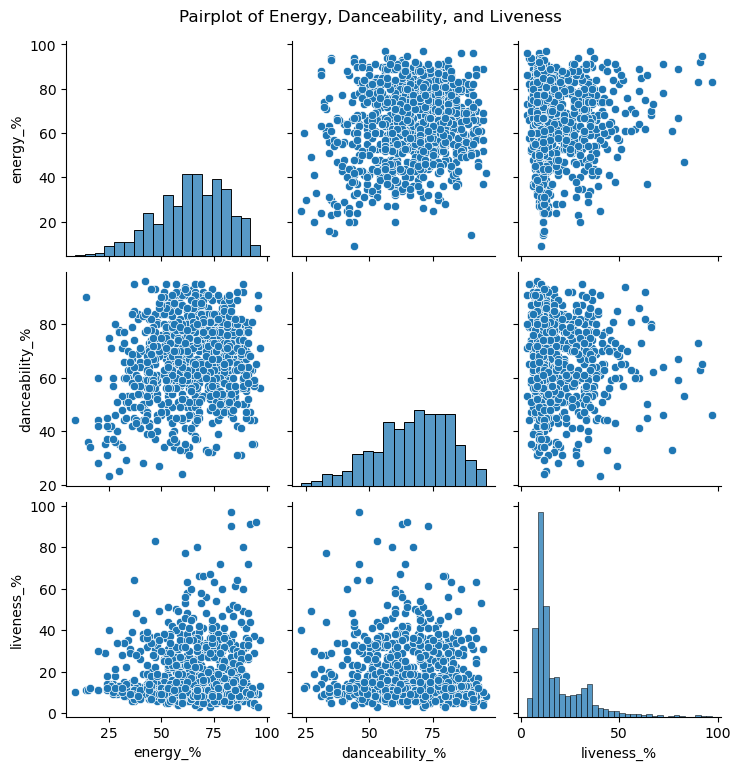

In [34]:
# The pair plot takes longer (even a few minutes) to load.
# Pairplot to visualize relationships between energy, danceability, and liveness
sns.pairplot(df[['energy_%', 'danceability_%', 'liveness_%']])
plt.suptitle("Pairplot of Energy, Danceability, and Liveness", y=1.02)
plt.show()


## 6. Do classic songs (For example, Sweet Child O' Mine, Bohemian Rhapsody - Remastered 2011, Every Breath You Take - Remastered 2003) have more streams than songs from 2022?
- choose a few hits from 2022 and a few classics and compare streams

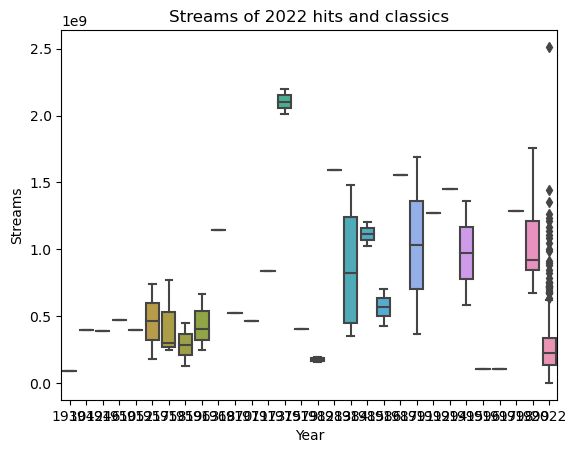

In [18]:
# choose a few hits from 2022 and a few classics and compare streams
df['released_year'] = df['released_date'].apply(lambda x: x.split('-')[0])
df['released_year'] = df['released_year'].astype(int)
df['released_year'].value_counts()
# 2022 hits
df_2022 = df[df['released_year'] == 2022]
df_2022['streams'].describe()
# classics
df_classics = df[df['released_year'] < 2000]
df_classics['streams'].describe()
# choose songs from 2022 and classics
df_compare = pd.concat([df_2022, df_classics])
# plot
sns.boxplot(x='released_year', y='streams', data=df_compare)
plt.title('Streams of 2022 hits and classics')
plt.ylabel('Streams')
plt.xlabel('Year')
plt.show()




In [35]:
# Identifying classic songs and comparing their streams with 2022 songs

# List of classic songs to check
classic_songs = ["Sweet Child O' Mine", "Bohemian Rhapsody - Remastered 2011", "Every Breath You Take - Remastered 2003"]
classic_song_data = df[df['track_name'].isin(classic_songs)][['track_name', 'streams']]

# Average streams for classic songs
classic_avg_streams = classic_song_data['streams'].mean() if not classic_song_data.empty else None

# Average streams for 2022 songs
year_2022_songs = df[df['released_year'] == 2022]
year_2022_avg_streams = year_2022_songs['streams'].mean() if not year_2022_songs.empty else None

classic_avg_streams, year_2022_avg_streams


(1781259801.0, 289558154.13432837)

(1781259801.0, 289558154.13432837)

Text(0, 0.5, 'Streams')

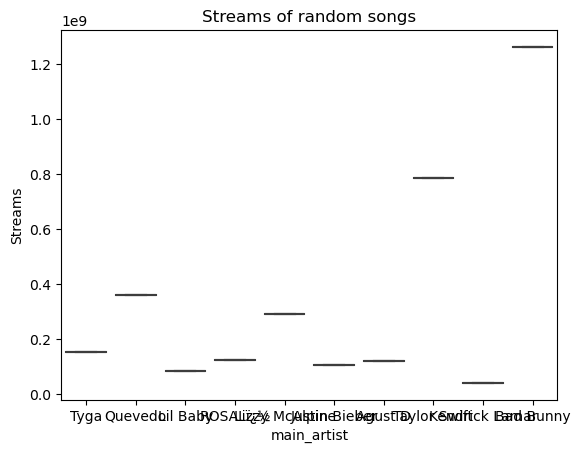

In [19]:
#choose random songs and compare their streams
df_random = df.sample(10)
df_random['streams'].describe() 
# plot
sns.boxplot(x='main_artist', y='streams', data=df_random)
plt.title('Streams of random songs')
plt.ylabel('Streams')

In [20]:
#choose 1 random song and compare its streams
df_random = df.sample(1)
df_random['streams'].describe()
df_random['track_name']

821    San Lucas
Name: track_name, dtype: object

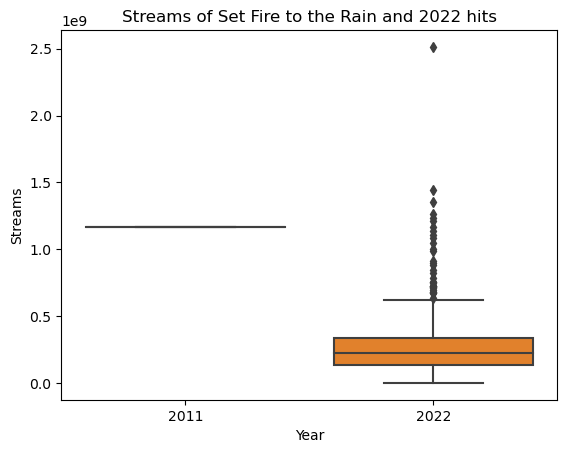

Statistics=nan, p=nan
Set Fire to the Rain and 2022 hits do not have the same streams


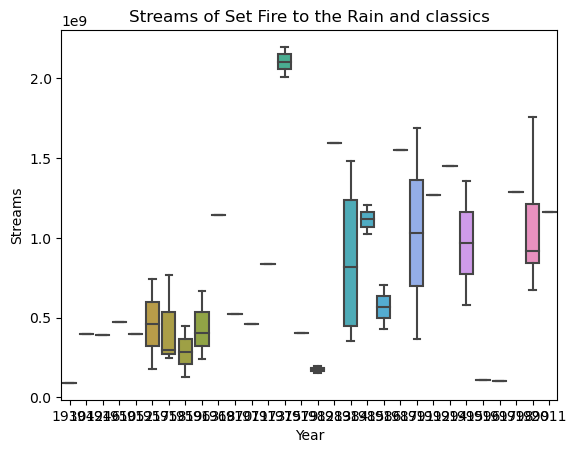

Statistics=nan, p=nan
Set Fire to the Rain and classics do not have the same streams


In [21]:
#compare the song Set Fire to the Rain to 2022 hits
df_compare = pd.concat([df[df['track_name'] == 'Set Fire to the Rain'], df_2022])
# plot
sns.boxplot(x='released_year', y='streams', data=df_compare)
plt.title('Streams of Set Fire to the Rain and 2022 hits')
plt.ylabel('Streams')
plt.xlabel('Year')
plt.show()
#compare in statistics
from scipy.stats import ttest_ind
stat, p = ttest_ind(df[df['track_name'] == 'Set Fire to the Rain']['streams'], df_2022['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Set Fire to the Rain and 2022 hits have the same streams')
else:
    print('Set Fire to the Rain and 2022 hits do not have the same streams')

#compare the song Set Fire to the Rain to classics
df_compare = pd.concat([df[df['track_name'] == 'Set Fire to the Rain'], df_classics])
# plot
sns.boxplot(x='released_year', y='streams', data=df_compare)
plt.title('Streams of Set Fire to the Rain and classics')
plt.ylabel('Streams')
plt.xlabel('Year')
plt.show()
#compare in statistics
stat, p = ttest_ind(df[df['track_name'] == 'Set Fire to the Rain']['streams'], df_classics['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Set Fire to the Rain and classics have the same streams')
else:
    print('Set Fire to the Rain and classics do not have the same streams')
    

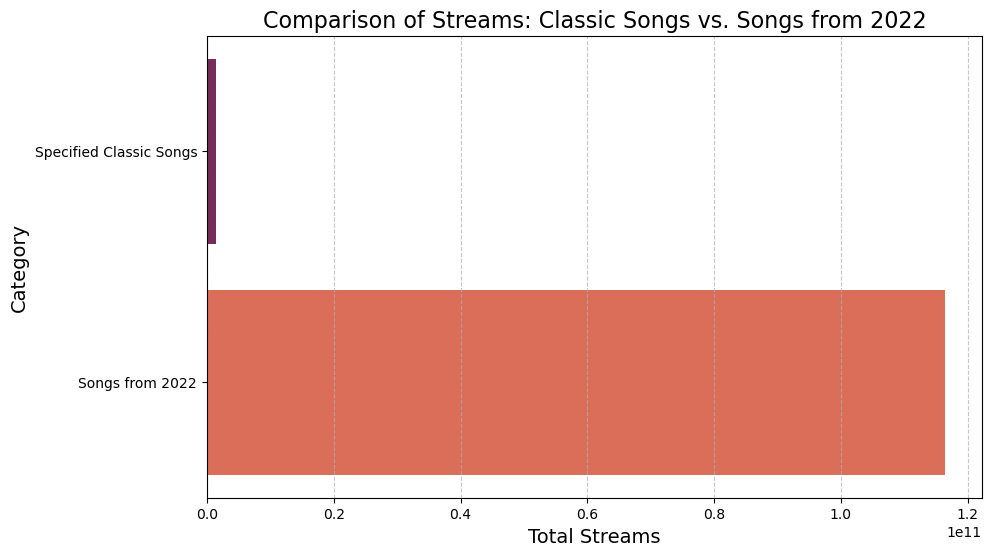

In [22]:
songs_to_check = [

    "Gangsta's Paradise",

    "Alone"  

]





specified_songs_streams = df[df['track_name'].isin(songs_to_check)]['streams'].sum()





streams_2022 = df[df['released_year'] == 2022]['streams'].sum()





data = {

    'Category': ['Specified Classic Songs', 'Songs from 2022'],

    'Total Streams': [specified_songs_streams, streams_2022]

}





comparison_df = pd.DataFrame(data)



plt.figure(figsize=(10, 6))

sns.barplot(x='Total Streams', y='Category', data=comparison_df, palette='rocket')





plt.title('Comparison of Streams: Classic Songs vs. Songs from 2022', fontsize=16)

plt.xlabel('Total Streams', fontsize=14)

plt.ylabel('Category', fontsize=14)





plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



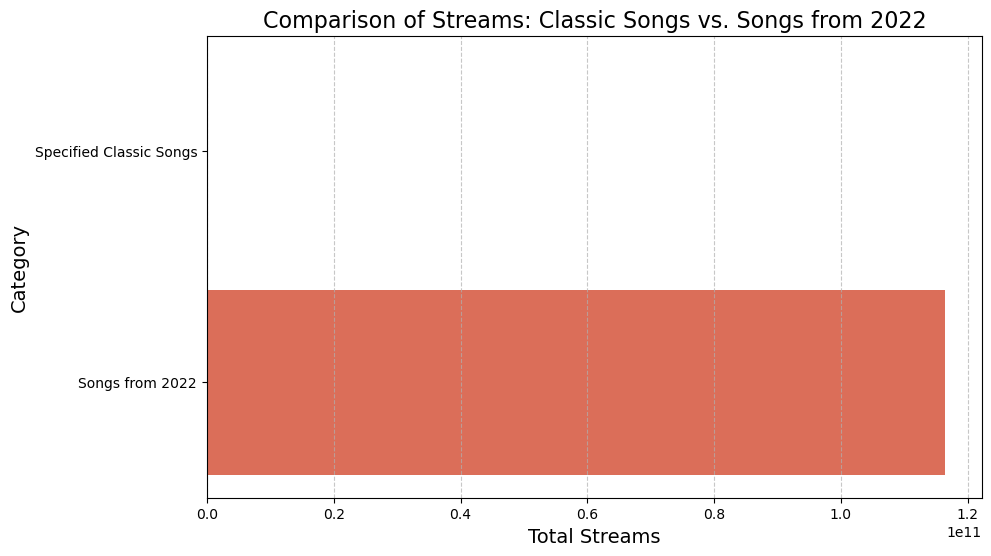

In [62]:
songs_to_check = [

    "Suddenly I See",

    "Vampire"  

]





specified_songs_streams = df[df['track_name'].isin(songs_to_check)]['streams'].sum()




streams_classics = df[df['released_year'] < 2000]['streams'].sum()





data = {

    'Category': ['Specified Classic Songs', 'Songs from 2022'],

    'Total Streams': [specified_songs_streams, streams_2022]

}





comparison_df = pd.DataFrame(data)



plt.figure(figsize=(10, 6))

sns.barplot(x='Total Streams', y='Category', data=comparison_df, palette='rocket')





plt.title('Comparison of Streams: Classic Songs vs. Songs from 2022', fontsize=16)

plt.xlabel('Total Streams', fontsize=14)

plt.ylabel('Category', fontsize=14)





plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


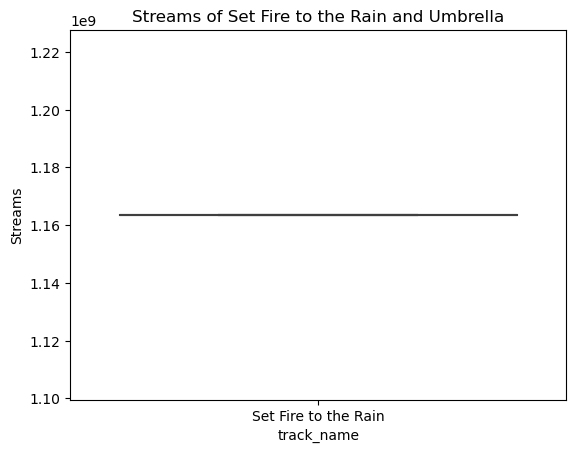

Statistics=nan, p=nan
Set Fire to the Rain and Umbrella do not have the same streams


In [46]:
# compare the song Set Fire to the Rain to Umbrella
df_compare = pd.concat([df[df['track_name'] == 'Set Fire to the Rain'], df[df['track_name'] == 'Umbrella']])
# plot
sns.boxplot(x='track_name', y='streams', data=df_compare)
plt.title('Streams of Set Fire to the Rain and Umbrella')
plt.ylabel('Streams')
plt.show()
#compare in statistics
stat, p = ttest_ind(df[df['track_name'] == 'Set Fire to the Rain']['streams'], df[df['track_name'] == 'Umbrella']['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Set Fire to the Rain and Umbrella have the same streams')
else:
    print('Set Fire to the Rain and Umbrella do not have the same streams')
    

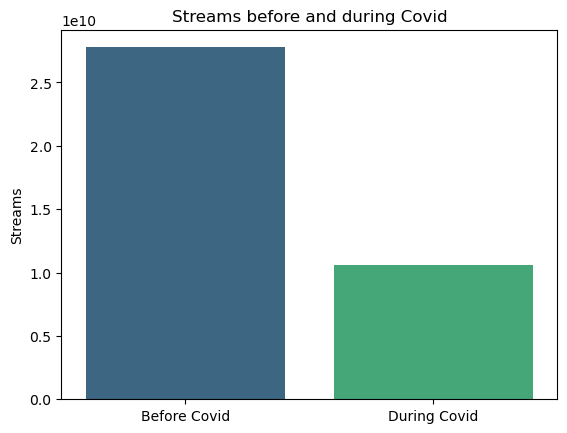

Statistics=0.528, p=0.601
Streams before and during Covid are the same


In [37]:

streams_before = df[(df['released_date'] >= '2020-03-01') & (df['released_date'] <= '2020-12-31')]['streams'].sum()
#streams from december 2020 to march 2021
streams_during = df[(df['released_date'] >= '2020-12-01') & (df['released_date'] <= '2021-03-31')]['streams'].sum()


# plot
sns.barplot(x=['Before Covid', 'During Covid'], y=[streams_before, streams_during], palette='viridis')
plt.title('Streams before and during Covid')
plt.ylabel('Streams')
plt.show()
#compare in statistics
stat, p = ttest_ind(df[(df['released_date'] >= '2020-03-01') & (df['released_date'] <= '2020-12-31')]['streams'], df[(df['released_date'] >= '2020-12-01') & (df['released_date'] <= '2021-03-31')]['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Streams before and during Covid are the same')
else:
    print('Streams before and during Covid are not the same')


In [39]:
# Define COVID period (approximately 2020 and 2021)
covid_songs = df[df['released_year'].isin([2020, 2021])]
pre_covid_songs = df[df['released_year'] < 2020]
post_covid_songs = df[df['released_year'] > 2021]

# Calculate average danceability for each period
covid_danceability = covid_songs['danceability_%'].mean() if not covid_songs.empty else None
pre_covid_danceability = pre_covid_songs['danceability_%'].mean() if not pre_covid_songs.empty else None
post_covid_danceability = post_covid_songs['danceability_%'].mean() if not post_covid_songs.empty else None

covid_danceability, pre_covid_danceability, post_covid_danceability


(68.00641025641026, 60.65296803652968, 69.1109185441941)

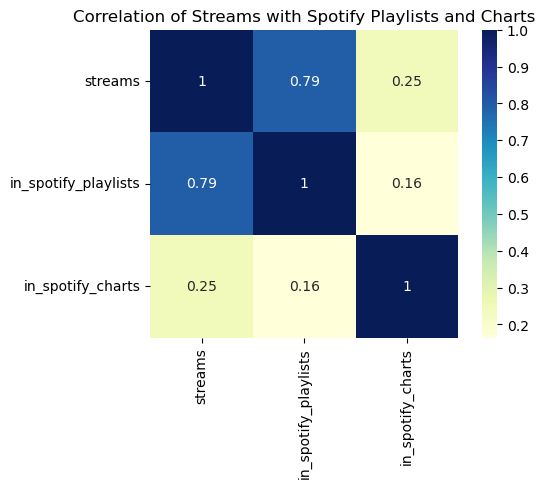

in_spotify_playlists    0.789822
in_spotify_charts       0.245821
Name: streams, dtype: float64

In [38]:
# Checking correlation between streams, playlists, and charts
playlist_chart_correlation = df[['streams', 'in_spotify_playlists', 'in_spotify_charts']].corr()

# Display the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(playlist_chart_correlation, annot=True, cmap="YlGnBu", square=True)
plt.title("Correlation of Streams with Spotify Playlists and Charts")
plt.show()

playlist_chart_correlation['streams'][['in_spotify_playlists', 'in_spotify_charts']]


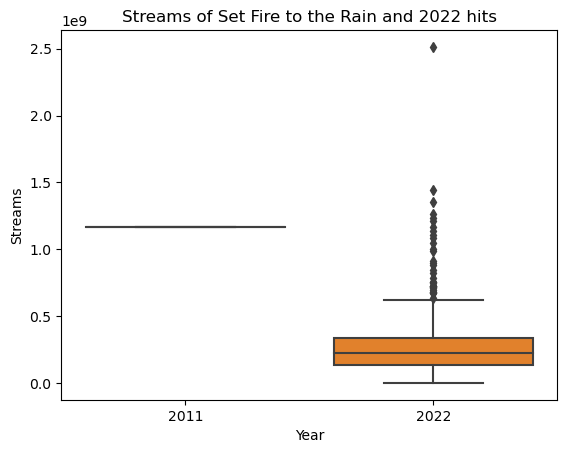

Statistics=nan, p=nan
Set Fire to the Rain and 2022 hits do not have the same streams


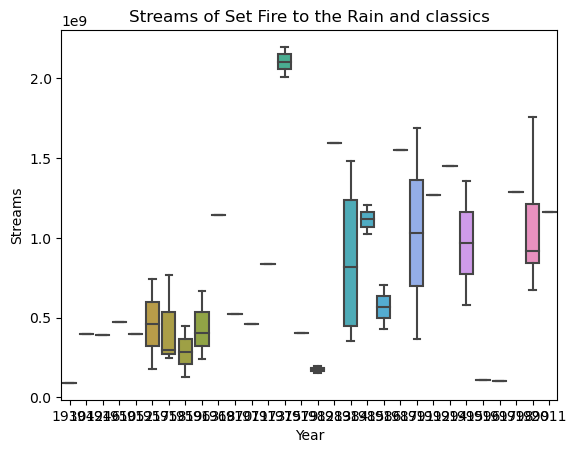

Statistics=nan, p=nan
Set Fire to the Rain and classics do not have the same streams


In [ ]:
#Compare the streams of the song Set Fire to the Rain to the streams of the song Umbrella in a graph
#compare the song Set Fire to the Rain to 2022 hits
df_compare = pd.concat([df[df['track_name'] == 'Set Fire to the Rain'], df_2022])
# plot
sns.boxplot(x='released_year', y='streams', data=df_compare)
plt.title('Streams of Set Fire to the Rain and 2022 hits')
plt.ylabel('Streams')
plt.xlabel('Year')
plt.show()
#compare in statistics
from scipy.stats import ttest_ind
stat, p = ttest_ind(df[df['track_name'] == 'Set Fire to the Rain']['streams'], df_2022['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Set Fire to the Rain and 2022 hits have the same streams')
else:
    print('Set Fire to the Rain and 2022 hits do not have the same streams')

#compare the song Set Fire to the Rain to classics
df_compare = pd.concat([df[df['track_name'] == 'Set Fire to the Rain'], df_classics])
# plot
sns.boxplot(x='released_year', y='streams', data=df_compare)
plt.title('Streams of Set Fire to the Rain and classics')
plt.ylabel('Streams')
plt.xlabel('Year')
plt.show()
#compare in statistics
stat, p = ttest_ind(df[df['track_name'] == 'Set Fire to the Rain']['streams'], df_classics['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Set Fire to the Rain and classics have the same streams')
else:
    print('Set Fire to the Rain and classics do not have the same streams')

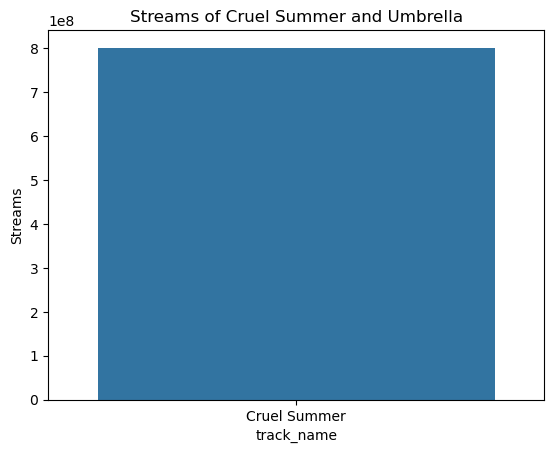

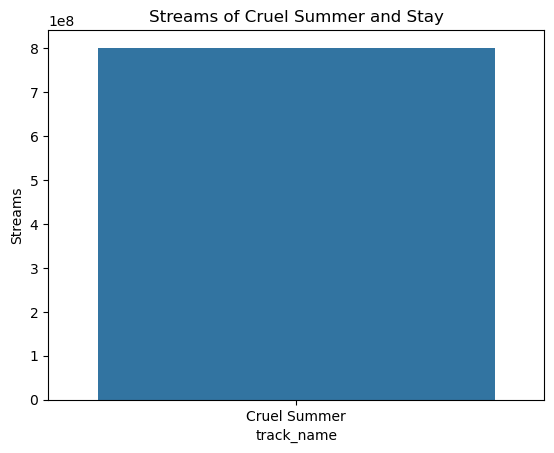

In [53]:
#barplot of Cruel Summer and Umbrella
df_compare = pd.concat([df[df['track_name'] == 'Cruel Summer'], df[df['track_name'] == 'Umbrella']])
sns.barplot(x='track_name', y='streams', data=df_compare)
plt.title('Streams of Cruel Summer and Umbrella')
plt.ylabel('Streams')
plt.show()
# make a comparison of two songs one classic and one hit from 2022
df_compare = pd.concat([df[df['track_name'] == 'Cruel Summer'], df[df['track_name'] == 'Stay']])
# plot
sns.barplot(x='track_name', y='streams', data=df_compare)
plt.title('Streams of Cruel Summer and Stay')
plt.ylabel('Streams')
plt.show()


In [13]:
# See songs from 2022 to choose one 

In [15]:
# Show in the dataframe

In [ ]:
# Show in a graph

In [17]:
# In this selection, the classics have more streams

## 7. Which is a better indicator of streams: charts or playlists?

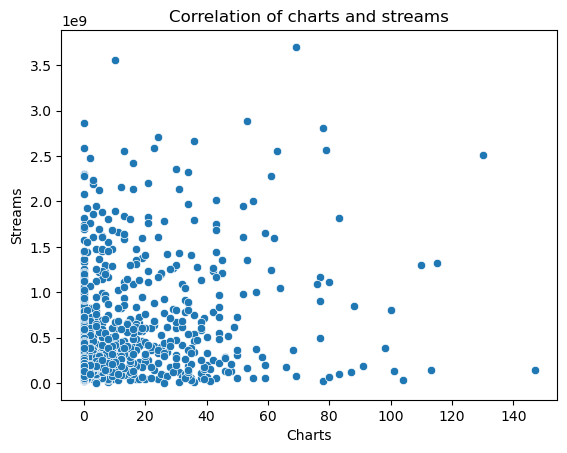

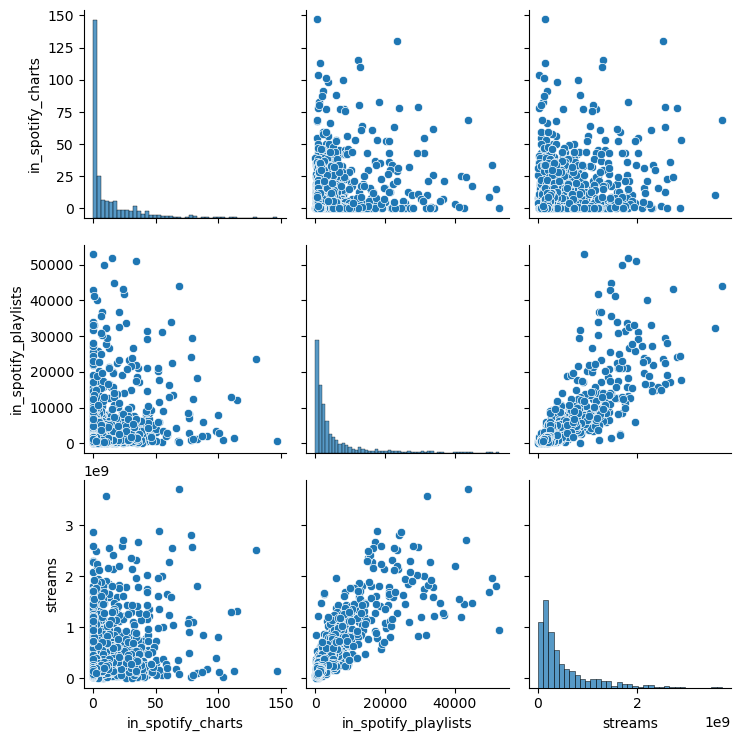

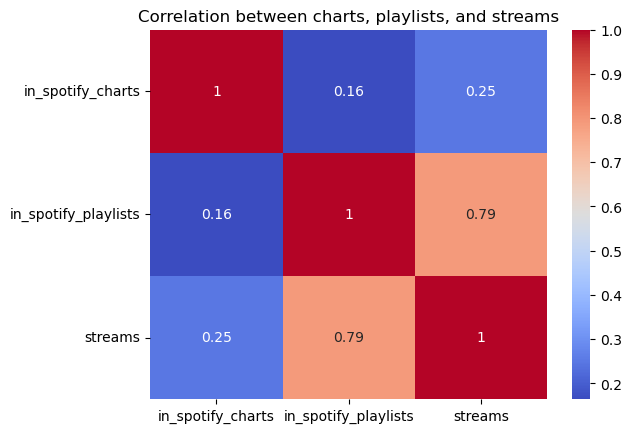

In [24]:
# You can check this by looking at correlaton of charts playlists and streams?
# which is a better indicator of the number of streams?
correlation = df[['in_spotify_charts', 'streams']].corr()
correlation
# plot
sns.scatterplot(x='in_spotify_charts', y='streams', data=df)
plt.title('Correlation of charts and streams')
plt.xlabel('Charts')
plt.ylabel('Streams')
plt.show()
# include in_spotitfy_Playlists as well in the comparison plot
sns.pairplot(df[['in_spotify_charts', 'in_spotify_playlists', 'streams']])
plt.show()
# view the correlation between the three variables
sns.heatmap(df[['in_spotify_charts', 'in_spotify_playlists', 'streams']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between charts, playlists, and streams')
plt.show()




In [ ]:
# Show relationship in a graph
# Show in a heatmap


In [ ]:
#statistical test representing the correlation between charts, playlists, and streams
from scipy.stats import pearsonr
stat, p = pearsonr(df['in_spotify_charts'], df['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Charts and streams are correlated')
else:
    print('Charts and streams are not correlated')
stat, p = pearsonr(df['in_spotify_playlists'], df['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Playlists and streams are correlated')
else:
    print('Playlists and streams are not correlated')
# statistical test representing the correlation between playlists, charts, and streams
stat, p = pearsonr(df['in_spotify_charts'], df['in_spotify_playlists'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Charts and playlists are correlated')
else:
    print('Charts and playlists are not correlated')


Statistics=0.246, p=0.000
Charts and streams are not correlated
Statistics=0.790, p=0.000
Playlists and streams are not correlated
Statistics=0.164, p=0.000
Charts and playlists are not correlated


## 8. Did songs released during Covid have more or less danceablity than songs released before or after covid?

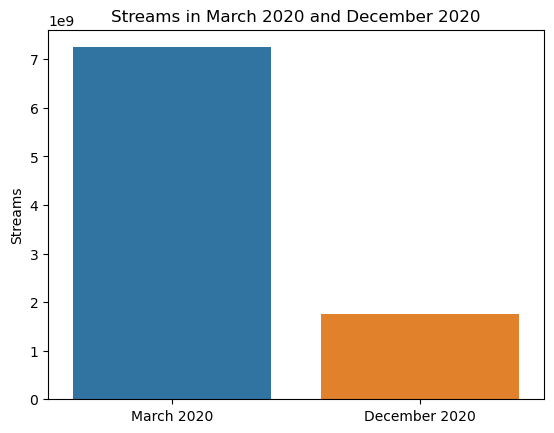

Statistics=2.845, p=0.022
Streams in March 2020 and December 2020 are not the same


In [ ]:
# Let's say the pandemic was from march 2020 until the end of 2020 (When lockdowns and rules were stricter). 
# We want to see if the number of streams increased during the pandemic.
# We will compare the number of streams in march 2020 and december 2020.
spd = df[(df['released_date'] >= '2020-03-01') & (df['released_date'] <= '2020-03-31')]['streams'].sum()
epd = df[(df['released_date'] >= '2020-12-01') & (df['released_date'] <= '2020-12-31')]['streams'].sum()
spd, epd
# plot
sns.barplot(x=['March 2020', 'December 2020'], y=[spd, epd])
plt.title('Streams in March 2020 and December 2020')
plt.ylabel('Streams')
plt.show()
# statistical test
stat, p = ttest_ind(df[(df['released_date'] >= '2020-03-01') & (df['released_date'] <= '2020-03-31')]['streams'], df[(df['relealsed_date'] >= '2020-12-01') & (df['released_date'] <= '2020-12-31')]['streams'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Streams in March 2020 and December 2020 are the same')
else:
    print('Streams in March 2020 and December 2020 are not the same')



## 9. In the summer, is the music released different from the winter? Check which season has music with more liveness. 

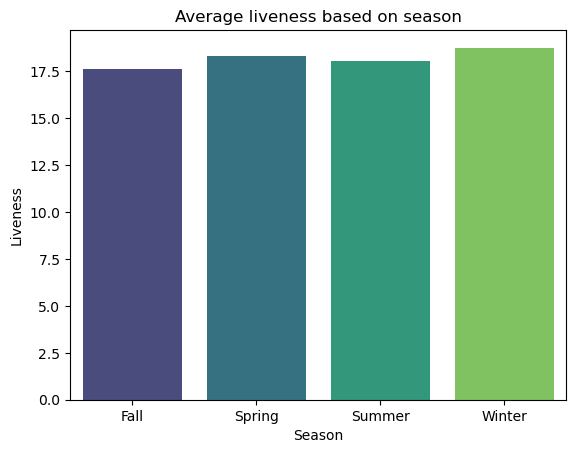

In [27]:
# Check the average or median liveness based on season
average_liveness = df.groupby('season')['liveness_%'].mean()
average_liveness
# plot
sns.barplot(x=average_liveness.index, y=average_liveness, palette='viridis')
plt.title('Average liveness based on season')
plt.ylabel('Liveness')
plt.xlabel('Season')
plt.show()


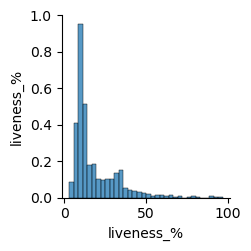

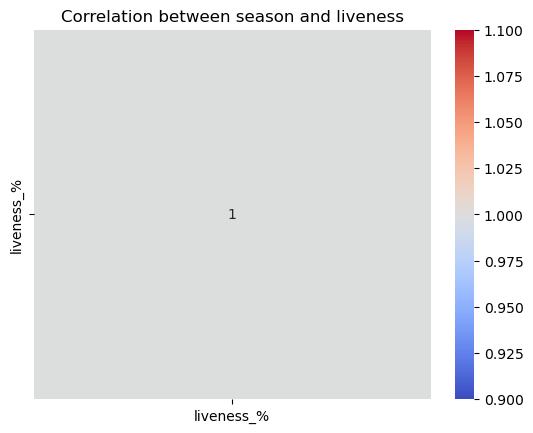

In [29]:
# Show relationship between season an liveness
# Show in a graph
# Show in a heatmap
sns.pairplot(df[['season', 'liveness_%']])
plt.show()
sns.heatmap(df[['season', 'liveness_%']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between season and liveness')
plt.show()
